In [2]:
%load_ext autoreload
%autoreload 2

import parse_data.prepare_data as prepare_data
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
from analysis.response_times import calculate_response_times, plot_response_times
import data_extraction.get_indices as get_indices
import plotting.plot_octagon as plot_octagon
import globals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import analysis.loser_inferred_choice as loser_inferred_choice
import seaborn as sns
import data_strings


In [3]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

In [ ]:
json_filenames = json_filenames_all_social

In [5]:
# prepare the session dataframe and dataframes of each individual trial
df, trial_list = prepare_data.prepare_data(data_folder, json_filenames, combine=True)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15-23-24_FrancescaSenSzeSocial.json
Loading complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\seventh_experiments_241113\2024-11-

In [6]:
get_indices.get_trials_with_wall_sep(trial_list=trial_list, wall_sep=1).size

684

In [7]:
## HEATMAPS ##

In [8]:
x_min = -20
x_max = 20
y_min = -20
y_max = 20

In [9]:
def heatmap_counts_from_location_data(location_array, n_rows=10, n_cols=10, x_min=x_min, x_max=x_max, 
                                      y_min=y_min, y_max=y_max):
    ''' Produce a matrix of counts across spatial location from n*2 location data '''

    # define a grid of counts
    grid_width = (x_max - x_min)/n_cols
    grid_height = (y_max - y_min)/n_rows
    grid = np.zeros([n_rows, n_cols])

    # Create a matrix of heatmap counts based on which bin starting location fits into
    for i in range(len(location_array[:,0])):
        x_val = location_array[i,0]
        y_val = location_array[i,1]
        x_bin = int((x_val - x_min)/grid_width)
        y_bin = int((y_val - y_min)/grid_height)

        if 0 <= y_bin < n_rows and 0 <= x_bin < n_cols:
            grid[y_bin, x_bin] += 1

    return grid

In [10]:
def plot_heatmap_from_count_array(ax, count_array, x_min=x_min, x_max=x_max, 
                                      y_min=y_min, y_max=y_max, vmin=None, vmax=None):

    # get the zipped coordinate list of octagon x and y vertex points
    octagon_vertex_coordinates = plot_octagon.return_octagon_path_points()

    if vmin is None:
        # display heatmap, covering the full graph
        im = ax.imshow(count_array, extent=[x_min, x_max, y_min, y_max],
                   origin='lower', cmap='plasma')

    else:
        # display heatmap, covering the full graph
        im = ax.imshow(count_array, extent=[x_min, x_max, y_min, y_max],
                   origin='lower', cmap='plasma', vmin=0, vmax=1)  
    
    # a matplotlib Artist with an edge and face colour
    patch = Polygon(octagon_vertex_coordinates, edgecolor='black', facecolor='none', lw=2)
    

    ax.add_patch(patch)         # make octagon outline visible
    im.set_clip_path(patch)     # crop image to coordinates inside the outline
    
    # Set aspect ratio to be square
    ax.set_aspect(1.)
    
    plt.colorbar(im)

    # ax.set_title("Count heatmap of winner location at the start of each trial")

    
    # # Loop over data dimensions and create text annotations.
    # coordinates = np.arange(x_min, x_max, count_array.shape[0])
    # for i in range(coordinates.size):
    #     for j in range(coordinates.size):
    #         text = ax.text(coordinates[j]+2.22, coordinates[i]+2.22, count_array[i, j],
    #                        ha="center", va="center", color="k")
    
    # give some white border to the graph
    ax.set_xlim([-22,22])
    ax.set_ylim([-22,22])


    print("total counts by location:\n", count_array)

    return ax

In [11]:
def plot_heatmap_from_count_array_sns(ax, count_array, bin_counts, x_min=x_min, x_max=x_max, 
                                      y_min=y_min, y_max=y_max, vmin=None, vmax=None):
    ''' Heatmap annotated with bin counts, no longer plotted over the octagon shape '''
    
    # probability data
    heatmap_data = count_array
    
    # count data
    annotation_data = bin_counts 

    # flip the y-axis
    heatmap_data = np.flipud(heatmap_data)
    annotation_data = np.flipud(bin_counts)
    
    # set up the x and y ranges for labeling bins from -20 to +20
    x_bins = np.linspace(-20, 20, 9)
    y_bins = np.linspace(-20, 20, 9)
    
    # create the heatmap
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(heatmap_data, annot=annotation_data, fmt=".0f", cmap="plasma", 
                     xticklabels=np.round(x_bins, 2), yticklabels=np.round(y_bins, 2),
                     vmin=0, vmax=1, # colourbar range
                     cbar_kws={'label': 'Heatmap Intensity'}, ax=ax)



    # get the zipped coordinate list of octagon x and y vertex points
    octagon_vertex_coordinates = plot_octagon.return_octagon_path_points()

    # a matplotlib Artist with an edge and face colour
    patch = Polygon(octagon_vertex_coordinates, edgecolor='black', facecolor='none', lw=2)
    

    ax.add_patch(patch)         # make octagon outline visible
    
    # Set labels
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title("Heatmap with Separate Annotation Values")
    
    plt.show()

In [12]:
def winner_start_loc_heatmap(trial_list, wall_sep=1,
                             trial_type=None,
                             chosen_wall=None):
    ''' Plot a heatmap of the winner's location in the arena when the walls are
        revealed. This is done for all trials with a given wall separation, and 
        flipped and rotated to put WALL_1 at 0 degrees and WALL_2 at 45 
        degrees '''
    
    # filter trials for a wall separation of wall_sep
    trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep) # verified correct indices
    print(f"number of trials with wall_sep {wall_sep} is: {trial_indices.size}")
    
    # further filter by HighLow trial type if specified
    if trial_type:
        trial_type_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
        trial_indices = np.intersect1d(trial_indices, trial_type_indices)
        print(f"number of trials with trial_type {trial_type} is: {trial_indices.size}")

    # further filter by chose High if specified
    if chosen_wall:
        chose_wall_trial_indices = get_indices.get_trials_chose_wall(trial_list, chosen_wall=chosen_wall)
        trial_indices = np.intersect1d(trial_indices, chose_wall_trial_indices)
        print(f"number of trials with chosen_wall {chosen_wall} is: {trial_indices.size}")
        
    trial_list_filtered = [trial_list[i] for i in trial_indices] # just list comp
    
    # flip and rotate the relevant trials for WALL_1 and WALL_2 to be walls 1 and 2
    flip_rotated_trials = []
    for i in range(len(trial_list_filtered)):
        flip_rotated_trials.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list_filtered, trial_index=i)) 
    
    # get the ID of the player who ended the trial, for each trial
    trigger_activators_slice_onset_loc = get_indices.get_trigger_activators_slice_onset_loc(flip_rotated_trials)
    trigger_activators_slice_onset_loc = np.asarray(trigger_activators_slice_onset_loc)
    
    # generate heat map data and plot
    count_array = heatmap_counts_from_location_data(trigger_activators_slice_onset_loc)
    print(f"number of trials in count_array is: {np.sum(count_array)}")
    ax = plot_octagon.plot_octagon()
    plot_heatmap_from_count_array(ax, count_array)

    return ax

In [13]:
def loser_start_loc_heatmap(trial_list, wall_sep=1,
                             trial_type=None,
                             chosen_wall=None):
    ''' Plot a heatmap of the loser's location in the arena when the walls are
        revealed. This is done for all trials with a given wall separation, and 
        flipped and rotated to put WALL_1 at 0 degrees and WALL_2 at 45 
        degrees '''
    
    # filter trials for a wall separation of wall_sep
    trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep) # verified correct indices
    
    # further filter by HighLow trial type if specified
    if trial_type:
        trial_type_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
        trial_indices = np.intersect1d(trial_indices, trial_type_indices)

    # further filter by chose High if specified
    if chosen_wall:
        chose_wall_trial_indices = get_indices.get_trials_chose_wall(trial_list, chosen_wall=chosen_wall)
        trial_indices = np.intersect1d(trial_indices, chose_wall_trial_indices)
        
    trial_list_filtered = [trial_list[i] for i in trial_indices] # just list comp
    
    # flip and rotate the relevant trials for WALL_1 and WALL_2 to be walls 1 and 2
    flip_rotated_trials = []
    for i in range(len(trial_list_filtered)):
        flip_rotated_trials.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list_filtered, trial_index=i)) 
    
    # get the ID of the player who ended the trial, for each trial
    trigger_activators = get_indices.get_trigger_activators(trial_list)
    loser_ids = 1 - trigger_activators # if the winner was 1, loser_id is 0, and vice versa
    losers_slice_onset_loc = get_indices.get_player_slice_onset_locs(flip_rotated_trials, player_id_list=loser_ids)
    losers_slice_onset_loc = np.asarray(losers_slice_onset_loc)
    
    # generate heat map data and plot
    count_array = heatmap_counts_from_location_data(losers_slice_onset_loc)
    ax = plot_octagon.plot_octagon()
    plot_heatmap_from_count_array(ax, count_array)

    return ax

In [14]:
def start_loc_heatmap(trial_list, wall_sep=1,
                             trial_type=None,
                             chosen_wall=None):
    ''' Plot a heatmap of both players location in the arena when the walls are
    revealed. This is done for all trials with a given wall separation, and 
    flipped and rotated to put WALL_1 at 0 degrees and WALL_2 at 45 
    degrees '''
    
    # filter trials for a wall separation of wall_sep
    trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep) # verified correct indices
    
    # further filter by HighLow trial type if specified
    if trial_type:
        trial_type_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
        trial_indices = np.intersect1d(trial_indices, trial_type_indices)
    
    # further filter by chose High if specified
    if chosen_wall:
        chose_wall_trial_indices = get_indices.get_trials_chose_wall(trial_list, chosen_wall=chosen_wall)
        trial_indices = np.intersect1d(trial_indices, chose_wall_trial_indices)
        
    trial_list_filtered = [trial_list[i] for i in trial_indices] # just list comp
    
    # flip and rotate the relevant trials for WALL_1 and WALL_2 to be walls 1 and 2
    flip_rotated_trials = []
    for i in range(len(trial_list_filtered)):
        flip_rotated_trials.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list_filtered, trial_index=i)) 
    
    # get the positions of both players for each trial, and include both
    print(f" flip_rotate_trials len: {len(flip_rotated_trials)}")
    player_0_slice_onset_loc = get_indices.get_player_slice_onset_locs(flip_rotated_trials, player_id_list=np.zeros(len(flip_rotated_trials)))
    player_0_slice_onset_loc = np.asarray(player_0_slice_onset_loc)
    print(f"player_0_slice_onset_loc shape = {player_0_slice_onset_loc.shape}")
    
    player_1_slice_onset_loc = get_indices.get_player_slice_onset_locs(flip_rotated_trials, player_id_list=np.ones(len(flip_rotated_trials)))
    player_1_slice_onset_loc = np.asarray(player_1_slice_onset_loc)

    slice_onset_locs = np.vstack([player_0_slice_onset_loc, player_1_slice_onset_loc])
    # generate heat map data and plot
    count_array = heatmap_counts_from_location_data(slice_onset_locs)
    ax = plot_octagon.plot_octagon()
    plot_heatmap_from_count_array(ax, count_array)
    
    return ax

In [15]:
def probability_chose_wall_location_heatmap(trial_list, wall_sep=1,
                                            trial_type=None,
                                            chosen_wall=globals.WALL_1,
                                            include_inferred_choice=True,
                                            bincounts=False):
    ''' Plot a heatmap of the probability of choosing a specific wall against the chooser's slice onset location
        This can be restricted by: trial type, wall separation'''

    ## FILTERING -----------------
    
    # filter trials for a wall separation of wall_sep
    trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep) # verified correct indices
    
    # further filter by trial type if specified
    if trial_type:
        trial_type_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
        trial_indices = np.intersect1d(trial_indices, trial_type_indices)
    
    # further filter by chosen wall
    chose_wall_trial_indices = get_indices.get_trials_chose_wall(trial_list, chosen_wall=chosen_wall)
    chose_wall_trial_indices = np.intersect1d(trial_indices, chose_wall_trial_indices)

    ## -----------------------
    
    # filter the trials lists by these indices
    trial_list_filtered = [trial_list[i] for i in trial_indices] # just list comp
    trial_list_filtered_chose_wall = [trial_list[i] for i in chose_wall_trial_indices] 

    ## FIND FLIPPED LOCATIONS -----------------------
    
    # flip and rotate the relevant trials for WALL_1 and WALL_2 to be walls 1 and 2
    flip_rotated_trials = []
    for i in range(len(trial_list_filtered)):
        flip_rotated_trials.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list_filtered, trial_index=i)) 
    flip_rotated_trials_chose_wall = []
    for i in range(len(trial_list_filtered_chose_wall)):
        flip_rotated_trials_chose_wall.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list_filtered_chose_wall, trial_index=i)) 
    
    # get the ID of the player who ended the trial, for each trial
    # then get this player's location. This makes up the actual-choice data
    trigger_activators_slice_onset_loc = get_indices.get_trigger_activators_slice_onset_loc(flip_rotated_trials)
    trigger_activators_slice_onset_loc = np.asarray(trigger_activators_slice_onset_loc)
    trigger_activators_slice_onset_loc_chose_wall = get_indices.get_trigger_activators_slice_onset_loc(flip_rotated_trials_chose_wall)
    trigger_activators_slice_onset_loc_chose_wall = np.asarray(trigger_activators_slice_onset_loc_chose_wall)

    ## -----------------------

    ## INFERRED CHOICE ----------------------------
    
    # if we are including inferred choice we want another two trial lists: relevant trials where inferred choice was confident, 
    # and relevant trials where inferred choice was confident and the choice was relevant
    # These will be the 2 arrays we use to find the probability for each location
    if include_inferred_choice:
        # identify inferred choice for all trials in session
        (loser_inferred_choice_wall_num,
        loser_inferred_choice_confidence) = loser_inferred_choice.infer_loser_choice_session(trial_list) # get inferred choices

        ## FILTERING -------------------
        
        # loop through each relevant trial index and identify if the loser's choice was confident
        trial_indices_inferred_choice_confident = []
        for trial_idx in trial_indices:
            if loser_inferred_choice_confidence[trial_idx] == True:
                trial_indices_inferred_choice_confident.append(trial_idx)

        print(f"trial_indices_inferred_choice_confident: {len(trial_indices_inferred_choice_confident)}")
        
        # loop through each relevant trial index and identify if the loser's choice was confident and the relevant wall
        trial_indices_inferred_choice_confident_and_relevant = []
        for trial_idx in trial_indices:
            # get the relevant wall number
            this_trial = trial_list[trial_idx]
            this_trial_walls = get_indices.get_walls(this_trial)
            relevant_wall_num = this_trial_walls[0] if chosen_wall == globals.WALL_1 else this_trial_walls[1]
            
            if loser_inferred_choice_confidence[trial_idx] == True and loser_inferred_choice_wall_num[trial_idx] == relevant_wall_num:
                trial_indices_inferred_choice_confident_and_relevant.append(trial_idx)

        print(f"trial_indices_inferred_choice_confident_and_relevant: {len(trial_indices_inferred_choice_confident_and_relevant)}")

        
        ## -------------------------------

        # filter the trials lists by these indices
        trial_list_filtered_inferred_choice_confident = [trial_list[i] for i in trial_indices_inferred_choice_confident] # just list comp
        trial_list_filtered_chose_wall_inferred_choice_confident = [trial_list[i] for i in trial_indices_inferred_choice_confident_and_relevant] 

        print(f"len trial_list_filtered_inferred_choice_confident = {len(trial_list_filtered_inferred_choice_confident)}")
        print(f"len trial_list_filtered_chose_wall_inferred_choice_confident = {len(trial_list_filtered_chose_wall_inferred_choice_confident)}")


        ## FIND FLIPPED LOCATIONS -----------------------

        # flip and rotate the relevant trials for WALL_1 and WALL_2 to be walls 1 and 2
        flip_rotated_trials_inferred_choice_confident = []
        for i in range(len(trial_list_filtered_inferred_choice_confident)):
            flip_rotated_trials_inferred_choice_confident.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list_filtered_inferred_choice_confident,
                                                                                                                   trial_index=i)) 
        flip_rotated_trials_chose_wall_inferred_choice_confident = []
        for i in range(len(trial_list_filtered_chose_wall_inferred_choice_confident)):
            flip_rotated_trials_chose_wall_inferred_choice_confident.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list_filtered_chose_wall_inferred_choice_confident,
                                                                                                                              trial_index=i)) 
        print(f"len flip_rotated_trials_inferred_choice_confident = {len(flip_rotated_trials_inferred_choice_confident)}")
        print(f"len flip_rotated_trials_chose_wall_inferred_choice_confident = {len(flip_rotated_trials_chose_wall_inferred_choice_confident)}")


        
        
        loser_slice_onset_loc = np.zeros([2,len(trial_list_filtered_inferred_choice_confident)])
        for i in range(len(trial_list_filtered_inferred_choice_confident)):
            
            this_trial = flip_rotated_trials_inferred_choice_confident[i]
            
            # identify loser id
            winner_id = get_indices.get_trigger_activator(this_trial)
            loser_id = 1 if winner_id == 0 else 0

            # loser location
            (loser_x_loc_slice_onset, 
             loser_y_loc_slice_onset) = get_indices.get_player_slice_onset_loc(this_trial, loser_id)

            loser_slice_onset_loc[:,i] = [loser_x_loc_slice_onset, loser_y_loc_slice_onset]
        
        loser_slice_onset_loc_chose_wall = np.zeros([2,len(trial_list_filtered_chose_wall_inferred_choice_confident)])
        for i in range(len(trial_list_filtered_chose_wall_inferred_choice_confident)):
            
            this_trial = flip_rotated_trials_chose_wall_inferred_choice_confident[i]
            
            # identify loser id
            winner_id = get_indices.get_trigger_activator(this_trial)
            loser_id = 1 if winner_id == 0 else 0

            # loser location
            (loser_x_loc_slice_onset, 
             loser_y_loc_slice_onset) = get_indices.get_player_slice_onset_loc(this_trial, loser_id)

            loser_slice_onset_loc_chose_wall[:,i] = [loser_x_loc_slice_onset, loser_y_loc_slice_onset]

        print(f" shape[1] of loser_slice_onset_loc = {loser_slice_onset_loc.shape[1]}")  
        print(f" shape[1] of loser_slice_onset_loc_chose_wall = {loser_slice_onset_loc_chose_wall.shape[1]}")

        print(f" loser_slice_onset_loc: {loser_slice_onset_loc[:,30:40]}")
        print(f" loser_slice_onset_loc: {loser_slice_onset_loc_chose_wall[:,30:40]}") 

        ## --------------------------

        ## COUNT ARRAYS --------------------------
        count_array_inferred_choice_confident = heatmap_counts_from_location_data(loser_slice_onset_loc.T, n_rows=9, n_cols=9)
        count_array_inferred_choice_confident_chose_wall = heatmap_counts_from_location_data(loser_slice_onset_loc_chose_wall.T, n_rows=9, n_cols=9)


        print("total inferred_choice trial counts by location:\n", count_array_inferred_choice_confident)
        print("chose inferred_choice relevant_wall counts by location:\n", count_array_inferred_choice_confident_chose_wall)

        ## -----------------------

    ## -------------------- END INFERRED CHOICE

           
            

    
    # get counts by location for all trials and for winner-chose-wall trials
    count_array = heatmap_counts_from_location_data(trigger_activators_slice_onset_loc, n_rows=9, n_cols=9)
    count_array_chose_wall = heatmap_counts_from_location_data(trigger_activators_slice_onset_loc_chose_wall, n_rows=9, n_cols=9)

    print("total trial counts by location:\n", count_array)
    print("chose wall counts by location:\n", count_array_chose_wall)

    ## IF INFERRED CHOICE, ADD THE INFERRED CHOICE COUNT ARRAYS TO THE STANDARD ONES
    if include_inferred_choice:
        count_array = count_array + count_array_inferred_choice_confident
        count_array_chose_wall = count_array_chose_wall + count_array_inferred_choice_confident_chose_wall

    # element-wise division, avoiding division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        probability_count_array = np.divide(count_array_chose_wall, count_array)
        probability_count_array[count_array == 0] = np.nan  # Set divisions by zero to NaN

    # remove bins with too few trials
    probability_count_array[count_array < 4] = np.nan  
    
    ax = plot_octagon.plot_octagon()
    if bincounts:
        plot_heatmap_from_count_array_sns(ax, probability_count_array, count_array, vmin=0, vmax=1)
    else:
        plot_heatmap_from_count_array(ax, probability_count_array, vmin=0, vmax=1)

    return ax

 flip_rotate_trials len: 558
player_0_slice_onset_loc shape = (558, 2)
total counts by location:
 [[  0.   0.   0.   0.   5.   2.   0.   0.   0.   0.]
 [  0.   1.   2.   3.   4.   6.   8.   1.   1.   0.]
 [  0.   3.   1.   6.   9.  13.   9.   5.   3.   0.]
 [  4.   3.   4.  24.  32.  37.  10.   4.   4.   3.]
 [  1.   5.   9.  41. 108. 123.  41.  11.   4.   4.]
 [  4.   4.  12.  38. 117. 127.  37.   4.   1.   2.]
 [  3.   7.   4.  15.  30.  33.  31.   8.   3.   1.]
 [  0.   3.   4.  10.   5.  14.   7.   1.   2.   0.]
 [  0.   2.   4.   3.   4.   5.   3.   4.   1.   0.]
 [  0.   0.   0.   2.   2.   5.   0.   0.   0.   0.]]


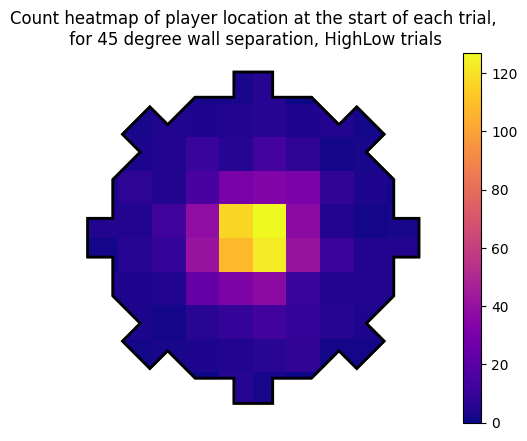

In [16]:
ax = start_loc_heatmap(trial_list, wall_sep=1,
                             trial_type=globals.HIGH_LOW,
                             chosen_wall=None)
ax.set_title("Count heatmap of player location at the start of each trial,\n for 45 degree wall separation, HighLow trials")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

number of trials with wall_sep 1 is: 684
number of trials with trial_type HighLow is: 558
number of trials in count_array is: 558.0
total counts by location:
 [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  3.  6.  3.  0.  0.  0.]
 [ 2.  1.  3.  6. 17. 17.  4.  1.  2.  1.]
 [ 0.  3.  1. 20. 50. 63. 19.  6.  2.  3.]
 [ 1.  2.  8. 19. 55. 69. 24.  3.  0.  2.]
 [ 0.  3.  2. 10. 20. 21. 21.  5.  1.  1.]
 [ 0.  1.  0.  8.  4.  9.  7.  1.  1.  0.]
 [ 0.  2.  1.  1.  2.  2.  3.  3.  1.  0.]
 [ 0.  0.  0.  1.  1.  5.  0.  0.  0.  0.]]


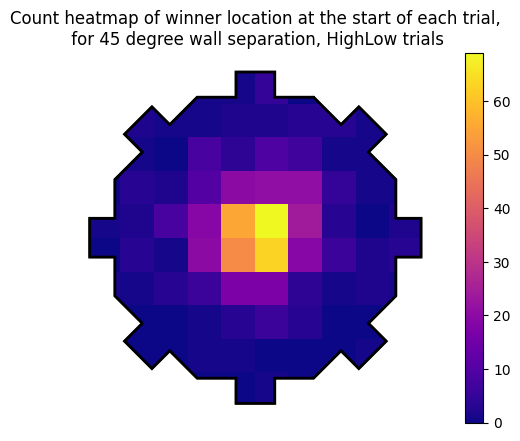

In [20]:
ax = winner_start_loc_heatmap(trial_list, wall_sep=1,
                             trial_type=globals.HIGH_LOW,
                             chosen_wall=None)
ax.set_title("Count heatmap of winner location at the start of each trial,\n for 45 degree wall separation, HighLow trials")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

number of trials with wall_sep 2 is: 414
number of trials with trial_type HighLow is: 325
number of trials in count_array is: 325.0
total counts by location:
 [[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  5. 11.  2.  2.  0.  0.]
 [ 1.  0.  3. 15. 35. 29. 10.  4.  0.  0.]
 [ 1.  3.  4. 12. 41. 39. 17.  5.  0.  3.]
 [ 0.  0.  1.  0.  9. 18.  8.  0.  6.  0.]
 [ 0.  0.  2.  2.  4.  4.  3.  1.  1.  0.]
 [ 0.  0.  1.  1.  1.  3.  1.  1.  2.  0.]
 [ 0.  0.  0.  0.  0.  3.  0.  0.  0.  0.]]


Text(0.5, 1.0, 'Count heatmap of winner location at the start of each trial,\n for 90 degree wall separation, HighLow trials')

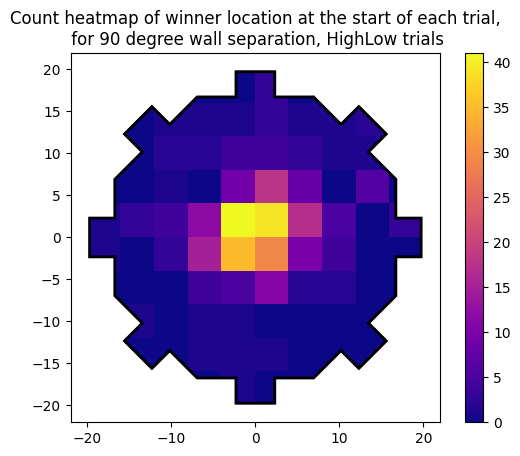

In [24]:
ax = winner_start_loc_heatmap(trial_list, wall_sep=2,
                             trial_type=globals.HIGH_LOW,
                             chosen_wall=None)
ax.set_title("Count heatmap of winner location at the start of each trial,\n for 90 degree wall separation, HighLow trials")

number of trials with wall_sep 4 is: 422
number of trials with trial_type HighLow is: 333
number of trials in count_array is: 333.0
total counts by location:
 [[ 0.  0.  0.  1.  0.  2.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  1.  2.  1.  1.  0.  0.]
 [ 0.  0.  1.  0.  3.  4.  3.  1.  2.  0.]
 [ 1.  1.  0.  7.  4. 19.  5.  3.  0.  0.]
 [ 0.  0.  2. 15. 35. 45.  4.  0.  1.  2.]
 [ 1.  1.  3. 10. 41. 38. 16.  2.  1.  0.]
 [ 0.  1.  1.  7.  8. 13.  5.  0.  1.  0.]
 [ 0.  0.  1.  0.  3.  5.  2.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


Text(0.5, 1.0, 'Count heatmap of winner location at the start of each trial,\n for 180 degree wall separation, HighLow trials')

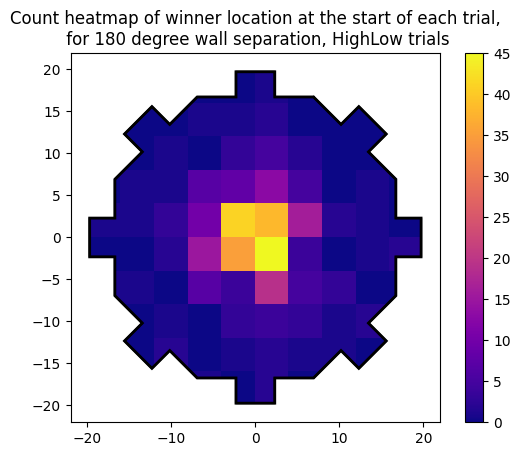

In [25]:
ax = winner_start_loc_heatmap(trial_list, wall_sep=4,
                             trial_type=globals.HIGH_LOW,
                             chosen_wall=None)
ax.set_title("Count heatmap of winner location at the start of each trial,\n for 180 degree wall separation, HighLow trials")

number of trials with wall_sep 1 is: 684
number of trials with trial_type HighLow is: 558
number of trials with chosen_wall data.wall1 is: 459
number of trials in count_array is: 459.0
total counts by location:
 [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  3.  5.  2.  0.  0.  0.]
 [ 2.  1.  2.  5. 13. 16.  3.  0.  1.  1.]
 [ 0.  2.  1. 19. 44. 55. 10.  2.  2.  3.]
 [ 1.  2.  8. 16. 50. 58. 18.  2.  0.  1.]
 [ 0.  3.  2. 10. 17. 14. 16.  3.  0.  1.]
 [ 0.  1.  0.  8.  4.  7.  2.  1.  0.  0.]
 [ 0.  2.  1.  1.  2.  1.  1.  3.  0.  0.]
 [ 0.  0.  0.  1.  1.  5.  0.  0.  0.  0.]]


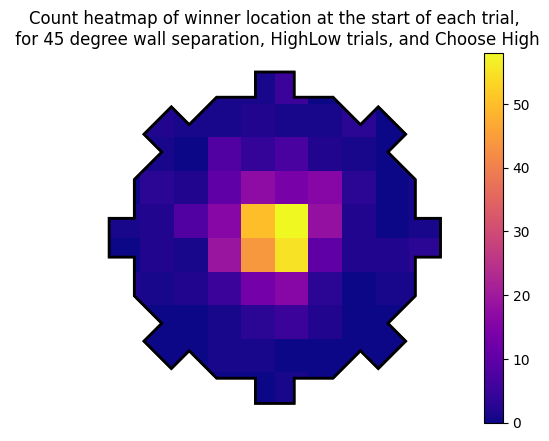

In [26]:
ax = winner_start_loc_heatmap(trial_list, wall_sep=1,
                             trial_type=globals.HIGH_LOW,
                             chosen_wall=globals.WALL_1)
ax.set_title("Count heatmap of winner location at the start of each trial,\n for 45 degree wall separation, HighLow trials, and Choose High")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

number of trials with wall_sep 1 is: 684
number of trials with trial_type HighLow is: 558
number of trials with chosen_wall data.wall2 is: 99
number of trials in count_array is: 99.0
total counts by location:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  4.  1.  1.  1.  1.  0.]
 [ 0.  1.  0.  1.  6.  8.  9.  4.  0.  0.]
 [ 0.  0.  0.  3.  5. 11.  6.  1.  0.  1.]
 [ 0.  0.  0.  0.  3.  7.  5.  2.  1.  0.]
 [ 0.  0.  0.  0.  0.  2.  5.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  2.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


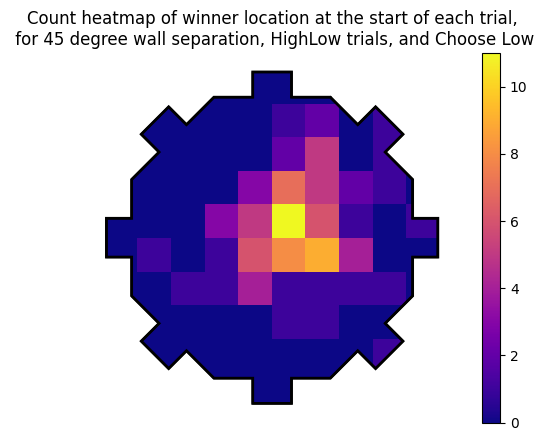

In [39]:
ax = winner_start_loc_heatmap(trial_list, wall_sep=1,
                             trial_type=globals.HIGH_LOW,
                             chosen_wall=globals.WALL_2)
ax.set_title("Count heatmap of winner location at the start of each trial,\n for 45 degree wall separation, HighLow trials, and Choose Low")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

number of trials with wall_sep 2 is: 414
number of trials with trial_type HighLow is: 325
number of trials with chosen_wall data.wall1 is: 212
number of trials in count_array is: 212.0
total counts by location:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  5.  5.  1.  1.  0.  0.]
 [ 1.  0.  3. 12. 24. 23.  5.  0.  0.  0.]
 [ 1.  3.  3. 10. 30. 19.  9.  3.  0.  0.]
 [ 0.  0.  0.  0.  6. 14.  3.  0.  4.  0.]
 [ 0.  0.  2.  2.  3.  2.  2.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  2.  0.  1.  2.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.]]


Text(0.5, 1.0, 'Count heatmap of winner location at the start of each trial,\n for 90 degree wall separation, HighLow trials, and Choose High')

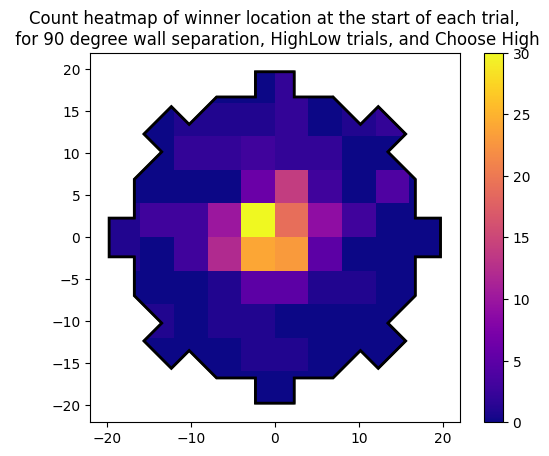

In [ ]:
ax = winner_start_loc_heatmap(trial_list, wall_sep=2,
                             trial_type=globals.HIGH_LOW,
                             chosen_wall=globals.WALL_1)
ax.set_title("Count heatmap of winner location at the start of each trial,\n for 90 degree wall separation, HighLow trials, and Choose High")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

number of trials with wall_sep 4 is: 422
number of trials with trial_type HighLow is: 333
number of trials with chosen_wall data.wall1 is: 195
number of trials in count_array is: 195.0
total counts by location:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  1.  1.  0.  0.]
 [ 1.  1.  0.  5.  0.  4.  3.  0.  0.  0.]
 [ 0.  0.  1. 11. 25. 26.  0.  0.  1.  0.]
 [ 1.  1.  3.  5. 30. 20.  8.  1.  1.  0.]
 [ 0.  1.  1.  5.  6. 10.  3.  0.  1.  0.]
 [ 0.  0.  1.  0.  2.  5.  2.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


Text(0.5, 1.0, 'Count heatmap of winner location at the start of each trial,\n for 180 degree wall separation, HighLow trials, and Choose High')

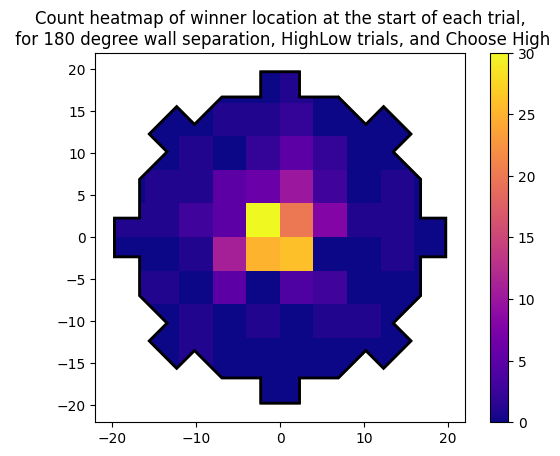

In [ ]:
ax = winner_start_loc_heatmap(trial_list, wall_sep=4,
                             trial_type=globals.HIGH_LOW,
                             chosen_wall=globals.WALL_1)
ax.set_title("Count heatmap of winner location at the start of each trial,\n for 180 degree wall separation, HighLow trials, and Choose High")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

total counts by location:
 [[ 0.  0.  0.  0.  2.  2.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  1.  3.  3.  0.  1.  0.]
 [ 0.  2.  0.  3.  6.  8.  5.  3.  1.  0.]
 [ 1.  1.  2. 11. 20. 21.  5.  1.  3.  1.]
 [ 1.  4.  5. 19. 51. 61. 22.  6.  2.  2.]
 [ 1.  2.  8. 19. 53. 64. 23.  1.  0.  1.]
 [ 3.  2.  4.  9. 12. 16. 16.  6.  3.  1.]
 [ 0.  1.  2.  4.  2.  5.  1.  1.  0.  0.]
 [ 0.  1.  1.  2.  3.  0.  3.  3.  1.  0.]
 [ 0.  0.  0.  2.  1.  0.  0.  0.  0.  0.]]


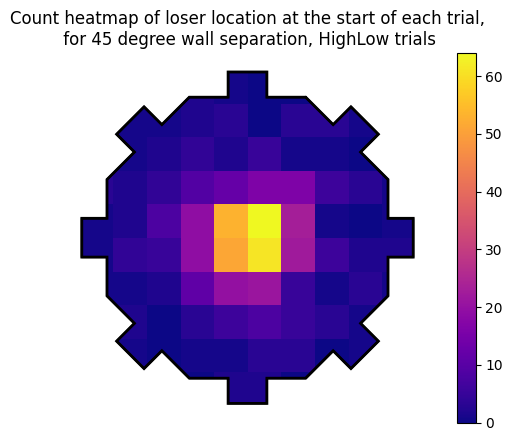

In [30]:
ax = loser_start_loc_heatmap(trial_list, wall_sep=1,
                             trial_type=globals.HIGH_LOW)
ax.set_title("Count heatmap of loser location at the start of each trial,\n for 45 degree wall separation, HighLow trials")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

total counts by location:
 [[ 0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  2.  0.  1.  1.  0.  0.]
 [ 0.  4.  1.  2.  2.  2.  2.  0.  1.  0.]
 [ 1.  0.  1.  6.  9. 14.  6.  2.  0.  0.]
 [ 2.  1.  2. 12. 40. 33.  8.  5.  1.  0.]
 [ 1.  1.  4. 10. 34. 36.  9.  4.  0.  1.]
 [ 0.  1.  2.  4.  7. 11.  5.  0.  4.  0.]
 [ 0.  0.  2.  3.  3.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  3.  3.  2.  1.  3.  0.]
 [ 0.  0.  0.  1.  1.  2.  0.  0.  0.  0.]]


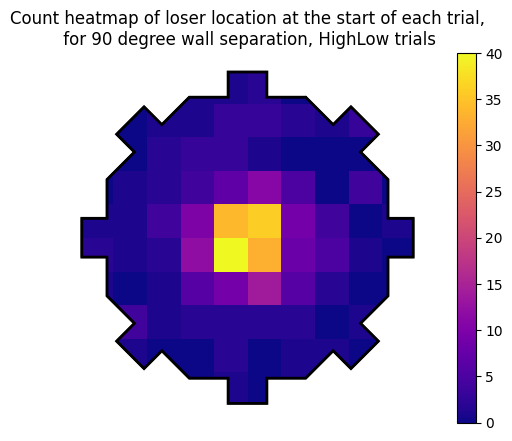

In [36]:
ax = loser_start_loc_heatmap(trial_list, wall_sep=2,
                             trial_type=globals.HIGH_LOW)
ax.set_title("Count heatmap of loser location at the start of each trial,\n for 90 degree wall separation, HighLow trials")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

total counts by location:
 [[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  2.  3.  3.  1.  0.  1.  0.]
 [ 2.  2.  2.  5. 10. 11.  7.  1.  2.  0.]
 [ 0.  1.  5. 14. 38. 38.  4.  4.  1.  2.]
 [ 0.  3.  4.  8. 43. 43. 11.  2.  1.  0.]
 [ 0.  1.  3.  8.  6. 11.  4.  1.  3.  0.]
 [ 0.  0.  1.  0.  0.  4.  3.  0.  2.  0.]
 [ 0.  0.  0.  0.  2.  2.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


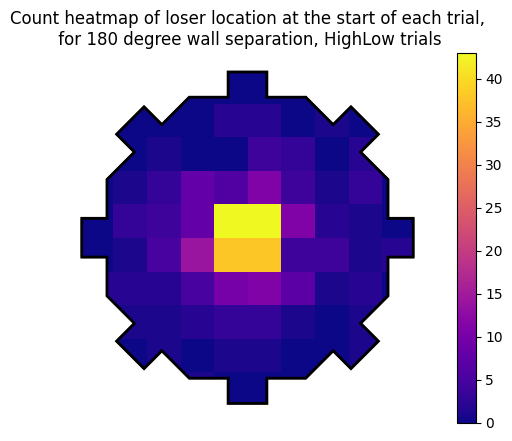

In [37]:
ax = loser_start_loc_heatmap(trial_list, wall_sep=4,
                             trial_type=globals.HIGH_LOW)
ax.set_title("Count heatmap of loser location at the start of each trial,\n for 180 degree wall separation, HighLow trials")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:319: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:45: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:146: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


trial_indices_inferred_choice_confident: 378
trial_indices_inferred_choice_confident_and_relevant: 194
len trial_list_filtered_inferred_choice_confident = 378
len trial_list_filtered_chose_wall_inferred_choice_confident = 194
len flip_rotated_trials_inferred_choice_confident = 378
len flip_rotated_trials_chose_wall_inferred_choice_confident = 194
 shape[1] of loser_slice_onset_loc = 378
 shape[1] of loser_slice_onset_loc_chose_wall = 194
 loser_slice_onset_loc: [[-7.47357607 -3.5747797  -2.28244686 -0.10315787 -7.04695375  8.1440164
  -4.93045062  4.17218351  3.69731975 -1.77336837]
 [ 0.01618282 -9.26623348 -1.35215425 -2.32706061 -3.61645653 -7.3733311
  -8.84029777 -3.87177825  1.88329566 -1.21641779]]
 loser_slice_onset_loc: [[ -3.4745698   -2.03281871  -5.92106677  -0.46396094   8.02685583
   -3.14447069  -2.14923286   5.53347731  -5.0106248   -0.1055558 ]
 [ -3.92560959  -3.841313    -9.53207995  -5.969245   -11.18909005
   -2.9934864    1.12519073  -2.70453739  -3.55226545 -17.7

Text(0.5, 1.0, 'Probability of choose High across locations at the start of each trial,\n for 45 degree wall separation')

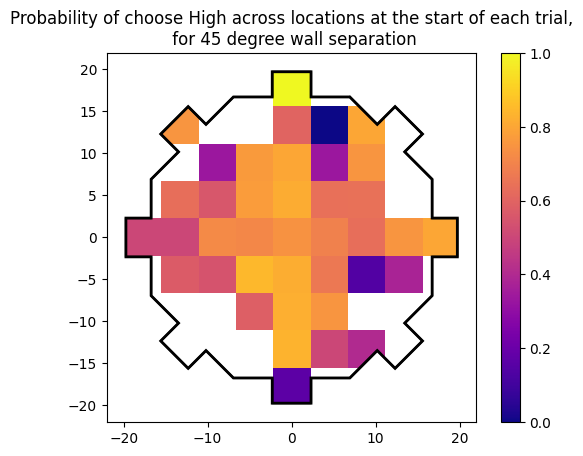

In [35]:
ax = probability_chose_wall_location_heatmap(trial_list, wall_sep=1,
                                                        trial_type=globals.HIGH_LOW,
                                                        chosen_wall=globals.WALL_1,
                                                        include_inferred_choice=True,
                                                        bincounts=False)
ax.set_title("Probability of choose High across locations at the start of each trial,\n for 45 degree wall separation")

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:319: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:45: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:146: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


trial_indices_inferred_choice_confident: 378
trial_indices_inferred_choice_confident_and_relevant: 108
len trial_list_filtered_inferred_choice_confident = 378
len trial_list_filtered_chose_wall_inferred_choice_confident = 108
len flip_rotated_trials_inferred_choice_confident = 378
len flip_rotated_trials_chose_wall_inferred_choice_confident = 108
 shape[1] of loser_slice_onset_loc = 378
 shape[1] of loser_slice_onset_loc_chose_wall = 108
 loser_slice_onset_loc: [[-7.47357607 -3.5747797  -2.28244686 -0.10315787 -7.04695375  8.1440164
  -4.93045062  4.17218351  3.69731975 -1.77336837]
 [ 0.01618282 -9.26623348 -1.35215425 -2.32706061 -3.61645653 -7.3733311
  -8.84029777 -3.87177825  1.88329566 -1.21641779]]
 loser_slice_onset_loc: [[ -1.05554867   1.48824538  -1.35583812   2.86997806  -4.71317603
  -10.6165214   -8.54767338  -5.07495513  -0.24214831  -3.79121633]
 [  0.37604171   1.7629841   -1.33463377  -3.5911763    0.97970467
   -2.86759335  -9.99269966  -8.93261133 -15.50401402   1.3

Text(0.5, 1.0, 'Probability heatmap of choose Low across locations at the start of each trial,\n for 45 degree wall separation, HighLow trials')

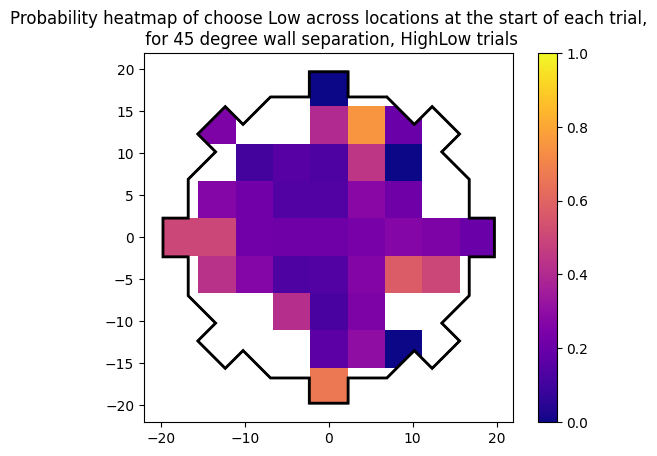

In [34]:
ax = probability_chose_wall_location_heatmap(trial_list, wall_sep=1,
                                            trial_type=globals.HIGH_LOW,
                                            chosen_wall=globals.WALL_2)
ax.set_title("Probability heatmap of choose Low across locations at the start of each trial,\n for 45 degree wall separation, HighLow trials")